# Brief Description

In 2021 there has been a contentious debate if vaccines have proved to be effective over Covid 19. The purpose of this project is to conduct a hypothesis test to draw an inference if these vaccines are reducing fatalities.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
from scipy.stats import pearsonr
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_style('white')
pd.options.display.float_format = '{:,.2f}'.format
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})

# Importing the csv files and doing some data cleaning

In [2]:
global_data = pd.read_csv('WHO COVID-19 global table data September 2nd 2021 at 2.32.54 PM.csv')
global_data.head()

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
0,Global,NaN,217558771,"2,791.17",4455323,57.16,527942,4517240,57.95,66630,0.85,7308
1,United States,Americas,38923013,"11,759.12",1106774,334.37,120560,634320,191.64,9274,2.80,744
2,India,South-East Asia,32810845,"2,377.59",298479,21.63,41965,439020,31.81,3262,0.24,460
3,Brazil,Americas,20752281,"9,763.05",168287,79.17,10466,579574,272.66,4726,2.22,266
4,Russian Federation,Europe,6937333,"4,753.73",132423,90.74,18368,184014,126.09,5591,3.83,790


In [3]:
#dropping unnecessary tables and renaming the columns that shifted when creating the data frame
global_data_new = global_data.filter(['Name',
                                      'Cases - cumulative total', 
                                      'Deaths - cumulative total',
                                      'Deaths - newly reported in last 7 days',
                                      'Cases - newly reported in last 7 days'], 
                                     axis=1)
global_data_new.head()

,Name,Cases - cumulative total,Deaths - cumulative total,Deaths - newly reported in last 7 days,Cases - newly reported in last 7 days
0,Global,217558771,4517240,66630,4455323
1,United States,38923013,634320,9274,1106774
2,India,32810845,439020,3262,298479
3,Brazil,20752281,579574,4726,168287
4,Russian Federation,6937333,184014,5591,132423
...,...,...,...,...,...
233,Saint Helena,0,0,0,0
234,Tokelau,0,0,0,0
235,Tonga,0,0,0,0
236,Turkmenistan,0,0,0,0


In [4]:
#renaming the columns 
global_data_final = global_data_new.rename(columns={'Name': 'Country', 
                                                    'Cases - cumulative total':'Cumulative Cases',
                                                    'Deaths - cumulative total':'Cumulative Deaths',
                                                    'Deaths - newly reported in last 7 days': 'New Deaths in the last 7 days',
                                                    'Cases - newly reported in last 7 days':'New Cases in the last 7 days'})

global_data_final.head()

,Country,Cumulative Cases,Cumulative Deaths,New Deaths in the last 7 days,New Cases in the last 7 days
0,Global,217558771,4517240,66630,4455323
1,United States,38923013,634320,9274,1106774
2,India,32810845,439020,3262,298479
3,Brazil,20752281,579574,4726,168287
4,Russian Federation,6937333,184014,5591,132423


In [5]:
#deleting rows that have recorded zero cases  
global_data_final_2 = global_data_final[(global_data_new.T != 0).any()]
global_data_final_2.head()

,Country,Cumulative Cases,Cumulative Deaths,New Deaths in the last 7 days,New Cases in the last 7 days
0,Global,217558771,4517240,66630,4455323
1,United States,38923013,634320,9274,1106774
2,India,32810845,439020,3262,298479
3,Brazil,20752281,579574,4726,168287
4,Russian Federation,6937333,184014,5591,132423
...,...,...,...,...,...
233,Saint Helena,0,0,0,0
234,Tokelau,0,0,0,0
235,Tonga,0,0,0,0
236,Turkmenistan,0,0,0,0


In [6]:
#removing the Global row 
global_data_final_2 = global_data_final_2.drop(index=global_data_final_2.index[0], 
                                               axis=0)
global_data_final_2.head()

,Country,Cumulative Cases,Cumulative Deaths,New Deaths in the last 7 days,New Cases in the last 7 days
1,United States,38923013,634320,9274,1106774
2,India,32810845,439020,3262,298479
3,Brazil,20752281,579574,4726,168287
4,Russian Federation,6937333,184014,5591,132423
5,The United Kingdom,6789585,132535,681,234381


In [7]:
#Sorting the dataframe alphabetically by index
global_data_final_2 = global_data_final_2.sort_index()
global_data_final_2.head()

,Country,Cumulative Cases,Cumulative Deaths,New Deaths in the last 7 days,New Cases in the last 7 days
1,United States,38923013,634320,9274,1106774
2,India,32810845,439020,3262,298479
3,Brazil,20752281,579574,4726,168287
4,Russian Federation,6937333,184014,5591,132423
5,The United Kingdom,6789585,132535,681,234381


In [8]:
#Adding new calulated columns 'Death Rate Cumulative' and 'Death Rate last 7 days' 
global_data_final_2['Death Rate - Cumulative'] = global_data_final_2['Cumulative Deaths']/global_data_final_2['Cumulative Cases']
    
global_data_final_2['Death Rate last 7 days'] = global_data_final_2['New Deaths in the last 7 days']/global_data_final_2['New Cases in the last 7 days']
    
global_data_final_2.head()

,Country,Cumulative Cases,Cumulative Deaths,New Deaths in the last 7 days,New Cases in the last 7 days,Death Rate - Cumulative,Death Rate last 7 days
1,United States,38923013,634320,9274,1106774,0.02,0.01
2,India,32810845,439020,3262,298479,0.01,0.01
3,Brazil,20752281,579574,4726,168287,0.03,0.03
4,Russian Federation,6937333,184014,5591,132423,0.03,0.04
5,The United Kingdom,6789585,132535,681,234381,0.02,0.00


In [9]:
vaccination_data = pd.read_csv('vaccination-data.csv')
vaccination_data.head()

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED
0,Afghanistan,AFG,EMRO,REPORTING,20/8/2021,"1,201,286.00","770,542.00",3.09,1.98,"430,744.00",1.11,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",22/2/2021,4.00
1,Albania,ALB,EURO,OWID,27/8/2021,"1,427,977.00","812,555.00",49.62,28.23,"615,422.00",21.39,"AstraZeneca - AZD1222, Pfizer BioNTech - Comir...",NaN,4.00
2,Algeria,DZA,AFRO,REPORTING,23/8/2021,"4,146,091.00","3,421,279.00",9.46,7.80,"724,812.00",1.65,"Beijing CNBG - BBIBP-CorV,Gamaleya - Sputnik V...",30/1/2021,3.00
3,American Samoa,ASM,WPRO,REPORTING,20/8/2021,"54,425.00","29,993.00",98.60,54.34,"24,977.00",45.25,"Janssen - Ad26.COV 2.5,Moderna - mRNA-1273,Pfi...",21/12/2020,3.00
4,Andorra,AND,EURO,OWID,15/8/2021,"91,660.00","51,044.00",118.63,66.06,"40,616.00",52.57,"AstraZeneca - AZD1222, Pfizer BioNTech - Comir...",NaN,2.00


In [10]:
#Removig unncessary columns
vaccination_data_cleaned = vaccination_data.filter(['COUNTRY',
                                                    'PERSONS_FULLY_VACCINATED_PER100'], 
                                                   axis=1)
vaccination_data_cleaned.head()

,COUNTRY,PERSONS_FULLY_VACCINATED_PER100
0,Afghanistan,1.11
1,Albania,21.39
2,Algeria,1.65
3,American Samoa,45.25
4,Andorra,52.57


In [11]:
#renaming columns
vaccination_data_cleaned = vaccination_data_cleaned.rename(columns={'COUNTRY':'Country', 
                                                                    'PERSONS_FULLY_VACCINATED_PER100':'Fully Vaccinated per 100'})
vaccination_data_cleaned.head()

,Country,Fully Vaccinated per 100
0,Afghanistan,1.11
1,Albania,21.39
2,Algeria,1.65
3,American Samoa,45.25
4,Andorra,52.57
...,...,...
222,Viet Nam,1.68
223,Wallis and Futuna,40.92
224,Yemen,0.04
225,Zambia,1.09


In [12]:
#merging the two dataframes 
global_cases_deaths_vax = pd.merge(left=global_data_final_2, 
                                   right=vaccination_data_cleaned, 
                                   left_on='Country', 
                                   right_on='Country')

global_cases_deaths_vax.head()

,Country,Cumulative Cases,Cumulative Deaths,New Deaths in the last 7 days,New Cases in the last 7 days,Death Rate - Cumulative,Death Rate last 7 days,Fully Vaccinated per 100
0,United States,38923013,634320,9274,1106774,0.02,0.01,52.18
1,India,32810845,439020,3262,298479,0.01,0.01,9.76
2,Brazil,20752281,579574,4726,168287,0.03,0.03,26.01
3,Russian Federation,6937333,184014,5591,132423,0.03,0.04,24.71
4,The United Kingdom,6789585,132535,681,234381,0.02,0.00,61.59


In [13]:
#Checking if there are Null values
global_cases_deaths_vax.isnull().values.any()

True

In [14]:
#Removing rows with null values so as to work with a clean and complete dataframe
global_cases_deaths_vax = global_cases_deaths_vax.dropna(how = 'any', axis = 0)
global_cases_deaths_vax.head()

,Country,Cumulative Cases,Cumulative Deaths,New Deaths in the last 7 days,New Cases in the last 7 days,Death Rate - Cumulative,Death Rate last 7 days,Fully Vaccinated per 100
0,United States,38923013,634320,9274,1106774,0.02,0.01,52.18
1,India,32810845,439020,3262,298479,0.01,0.01,9.76
2,Brazil,20752281,579574,4726,168287,0.03,0.03,26.01
3,Russian Federation,6937333,184014,5591,132423,0.03,0.04,24.71
4,The United Kingdom,6789585,132535,681,234381,0.02,0.00,61.59
...,...,...,...,...,...,...,...,...
200,Northern Mariana Islands (Commonwealth of the),243,2,0,14,0.01,0.00,56.14
201,Anguilla,217,0,0,51,0.00,0.00,59.76
202,New Caledonia,136,0,0,1,0.00,0.00,22.08
204,Montserrat,29,1,0,4,0.03,0.00,27.36


In [15]:
#Double Checking for null values
global_cases_deaths_vax.isnull().values.any()

False

In [16]:
#removing rows with an infs error
global_cases_deaths_vax = global_cases_deaths_vax.drop(126, axis=0)
global_cases_deaths_vax

#saving as a csv copy
global_cases_deaths_vax.to_csv('Global Covid data.csv')

# Data Visualisation of Top 10 Countries in terms of Cases, Deaths and Vaccination Rates

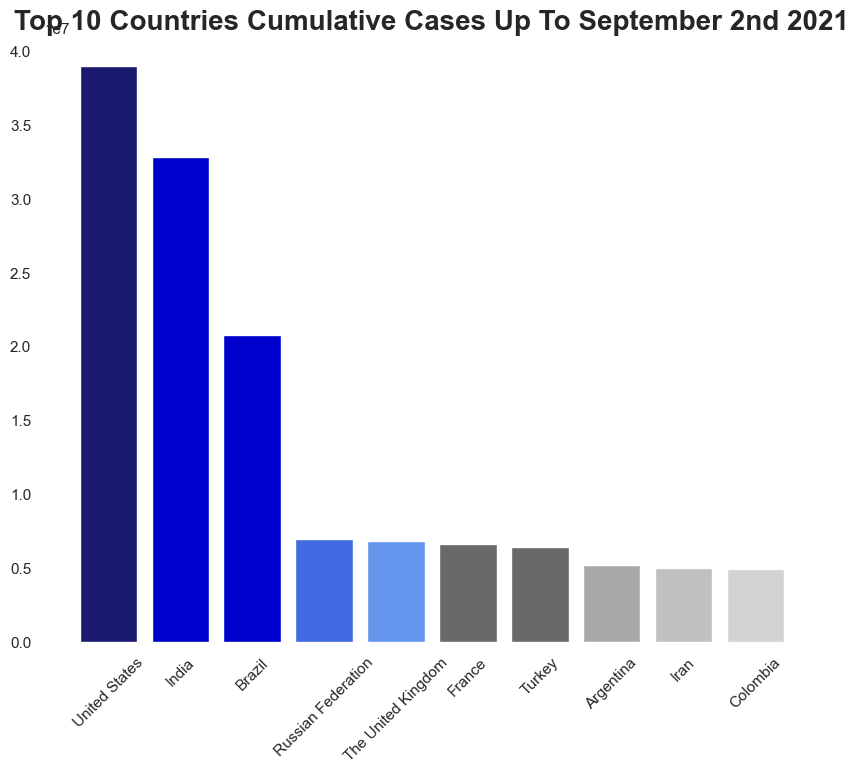

In [17]:
#Sorting the data in descending order then slicing to get the 10 countries with the highest cumulative cases
global_cases_deaths_vax_sorted_desc_cases = global_cases_deaths_vax.sort_values('Cumulative Cases', 
                                                                                ascending = False)
global_cases_deaths_vax_sorted_desc_cases = global_cases_deaths_vax_sorted_desc_cases.iloc[:10]

ax = plt.gca()

plt.bar(global_cases_deaths_vax_sorted_desc_cases['Country'], global_cases_deaths_vax_sorted_desc_cases['Cumulative Cases'],
        color = ['midnightblue',
                 'mediumblue',
                 'mediumblue',
                 'royalblue', 
                 'cornflowerblue', 
                 'dimgrey', 
                 'dimgrey',
                 'darkgrey', 
                 'silver', 
                 'lightgrey'])

plt.xticks(rotation = 45)

plt.title('Top 10 Countries Cumulative Cases Up To September 2nd 2021', 
          fontweight = 'bold', 
          fontsize = 20)

ax.set_frame_on(False)

plt.show()

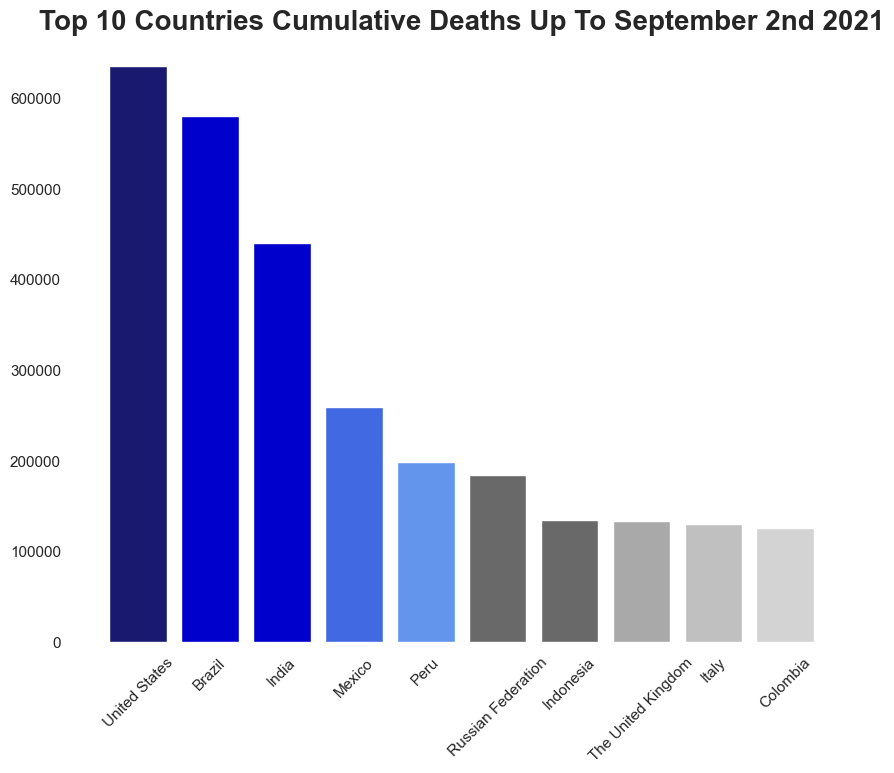

In [18]:
#Sorting the data in descending order then slicing to get the 10 countries with the highest cumulative deaths
global_cases_deaths_vax_sorted_desc_deaths = global_cases_deaths_vax.sort_values('Cumulative Deaths', 
                                                                                 ascending = False)

global_cases_deaths_vax_sorted_desc_deaths = global_cases_deaths_vax_sorted_desc_deaths.iloc[:10]

ax = plt.gca()

plt.bar(global_cases_deaths_vax_sorted_desc_deaths['Country'], 
        global_cases_deaths_vax_sorted_desc_deaths['Cumulative Deaths'], 
        color = ['midnightblue',
                 'mediumblue',
                 'mediumblue',
                 'royalblue', 
                 'cornflowerblue', 
                 'dimgrey', 
                 'dimgrey',
                 'darkgrey', 
                 'silver', 
                 'lightgrey'])
plt.xticks(rotation = 45)

plt.title('Top 10 Countries Cumulative Deaths Up To September 2nd 2021', 
          fontweight = 'bold', 
          fontsize = 20)

ax.set_frame_on(False)

plt.show()

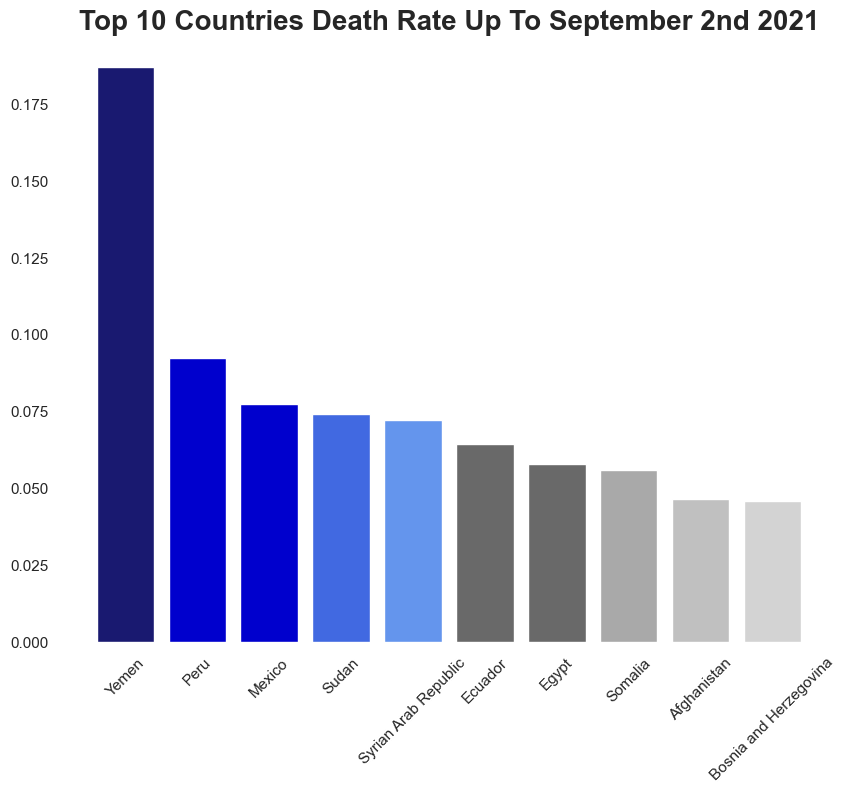

In [19]:
#Sorting the data in descending order then slicing to get the 10 countries with the highest death rate
global_cases_deaths_vax_sorted_desc_death_rate = global_cases_deaths_vax.sort_values('Death Rate - Cumulative', 
                                                                                     ascending = False)

global_cases_deaths_vax_sorted_desc_death_rate = global_cases_deaths_vax_sorted_desc_death_rate.iloc[:10]

ax = plt.gca()

plt.bar(global_cases_deaths_vax_sorted_desc_death_rate['Country'], 
        global_cases_deaths_vax_sorted_desc_death_rate['Death Rate - Cumulative'], 
        color = ['midnightblue',
                 'mediumblue',
                 'mediumblue',
                 'royalblue', 
                 'cornflowerblue', 
                 'dimgrey', 
                 'dimgrey',
                 'darkgrey', 
                 'silver', 
                 'lightgrey'])

plt.xticks(rotation = 45)

plt.title('Top 10 Countries Death Rate Up To September 2nd 2021',
          fontweight = 'bold', 
          fontsize = 20)

ax.set_frame_on(False)

plt.show()

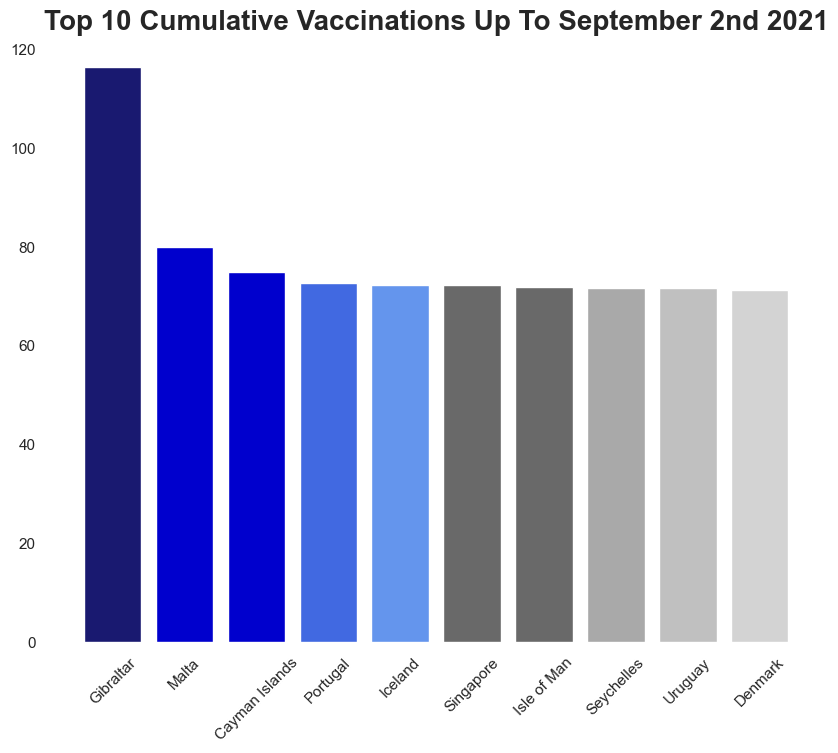

In [20]:
#Sorting the data in descending order then slicing to get the 10 countries with the highest vaccination rate
global_cases_deaths_vax_sorted_desc_vax = global_cases_deaths_vax.sort_values('Fully Vaccinated per 100',
                                                                              ascending = False)
global_cases_deaths_vax_sorted_desc_vax = global_cases_deaths_vax_sorted_desc_vax.iloc[:10]

ax = plt.gca()

plt.bar(global_cases_deaths_vax_sorted_desc_vax['Country'], 
        global_cases_deaths_vax_sorted_desc_vax['Fully Vaccinated per 100'], 
        color = ['midnightblue',
                 'mediumblue',
                 'mediumblue',
                 'royalblue', 
                 'cornflowerblue', 
                 'dimgrey', 
                 'dimgrey',
                 'darkgrey', 
                 'silver', 
                 'lightgrey'])

plt.xticks(rotation = 45)

plt.title('Top 10 Cumulative Vaccinations Up To September 2nd 2021', 
          fontweight = 'bold', 
          fontsize = 20)

ax.set_frame_on(False)

plt.show()

# Hypothesis testing Using the Pearson Correlation


**What is Pearson Correlation

This is a measure of linear correlation between two data sets.

Its the ration between covariance of two variables and the product of their standard deviation.

Stating the Null and Alternative Hypothesis

H0: High vaccination rates do not lead to lower death rates

H1: High vaccination rates do lead to lower death rates

In [21]:
vax_data = list(global_cases_deaths_vax['Fully Vaccinated per 100'])

death_rate_data = list(global_cases_deaths_vax['Death Rate - Cumulative'])

new_death_rate_last_7_days = list(global_cases_deaths_vax['Death Rate last 7 days'])

In [22]:
#Testing at the 95% confidence interval and at the 99% confidence interval
# linear relationship between vaccinate rate and death rate cumulative
stat, p = pearsonr(vax_data, death_rate_data)
print('stat=%.5f, p=%.5f' % (stat, p))

if p > 0.05:
    print('Probably the two data samples are independent & we fail to reject HO')
else:
    print('Probably the two data samples are dependent & we reject HO')
 
    
print('______________________________________')

if p > 0.01:
    print('Probably the two data samples are independent & we fail to reject HO')
else:
    print('Probably the two data samples are dependent & we reject HO')

stat=-0.29076, p=0.00004
Probably the two data samples are dependent & we reject HO
______________________________________
Probably the two data samples are dependent & we reject HO


**Comments on results

At both the 5% and 1% levels of significance, we accept the alternative hypothesis and reject the null hypothesis. Therefore both at the 95% and 99% confidence interval there is reasonable statistical evidence to believe that the more people who are vaccinated against covid-19 the fewer fatalities that are likely to occur.

In [23]:
#Testing at the 95% confidence interval and at the 99% confidence interval
# linear relationship between vaccinate rate and death rate last 7 days
stat, p = pearsonr(vax_data, new_death_rate_last_7_days)
print('stat=%.5f, p=%.5f' % (stat, p))

if p > 0.05:
    print('Probably the two data samples are independent & we fail to reject HO')
else:
    print('Probably the two data samples are dependent & we reject HO')
    
print('______________________________________')
    
if p > 0.01:
    print('Probably the two data samples are independent & we fail to reject HO')
else:
    print('Probably the two data samples are dependent & we reject HO')

stat=-0.30662, p=0.00001
Probably the two data samples are dependent & we reject HO
______________________________________
Probably the two data samples are dependent & we reject HO


**Comments on results

At both the 5% and 1% levels of significance, we accept the alternative hypothesis and reject the null hypothesis. Therefore both at the 95% and 99% confidence interval there is reasonable statistical evidence to believe that the more people who are vaccinated against covid-19 the fewer fatalities that are likely to occur.

# Hypothesis testing Using the Spearman Rank Correlation

**What is Spearman Rank Correlation

This is to measure the monotonic relationship between two variable.


Stating the Null and Alternative Hypothesis

H0: High vaccination rates do not lead to lower death rates

H1: High vaccination rates do lead to lower death rates

In [24]:
#Testing at the 95% confidence interval and at the 99% confidence interval
# linear relationship between vaccinate rate and death rate cumulative
stat, p = spearmanr(vax_data, death_rate_data)
print('stat=%.5f, p=%.5f' % (stat, p))
if p > 0.05:
    print('Probably the two data samples are independent & we fail to reject HO')
else:
    print('Probably the two data samples are dependent & we reject H0')

    
print('______________________________________')
    
if p > 0.01:
    print('Probably the two data samples are independent & we fail to reject HO ')
else:
    print('Probably the two data samples are dependent & we reject HO')

stat=-0.34643, p=0.00000
Probably the two data samples are dependent & we reject H0
______________________________________
Probably the two data samples are dependent & we reject HO


**Comments on results

At both the 5% and 1% levels of significance, we accept the alternative hypothesis and reject the null hypothesis. Therefore both at the 95% and 99% confidence interval there is reasonable statistical evidence to believe that the more people who are vaccinated against covid-19 the fewer fatalities that are likely to occur.

In [25]:
#Testing at the 95% confidence interval and at the 99% confidence interval
# linear relationship between vaccinate rate and death rate last 7 days
stat, p = spearmanr(vax_data, new_death_rate_last_7_days)
print('stat=%.5f, p=%.5f' % (stat, p))
if p > 0.05:
    print('Probably the two data samples are independent & we fail to reject HO')
else:
    print('Probably the two data samples are dependent & we reject HO')
    
print('______________________________________')
    
if p > 0.01:
    print('Probably the two data samples are independent & we fail to reject HO')
else:
    print('Probably the two data samples are dependent & we reject HO')

stat=-0.37099, p=0.00000
Probably the two data samples are dependent & we reject HO
______________________________________
Probably the two data samples are dependent & we reject HO


**Comments on results

At both the 5% and 1% levels of significance, we accept the alternative hypothesis and reject the null hypothesis. Therefore both at the 95% and 99% confidence interval there is reasonable statistical evidence to believe that the more people who are vaccinated against covid-19 the fewer fatalities that are likely to occur.

# Visual illustration of the correlation

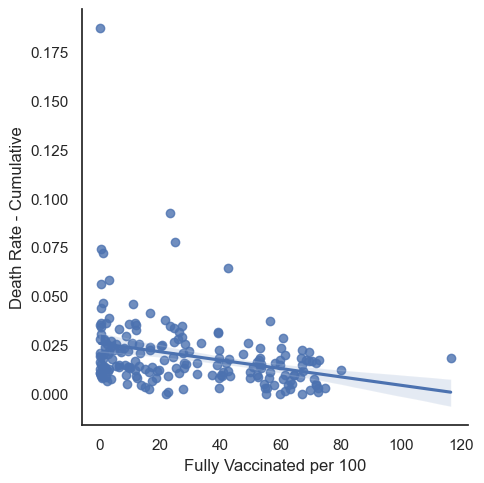

<Figure size 2000x1500 with 0 Axes>

In [26]:
sns.lmplot(x = 'Fully Vaccinated per 100', 
           y = 'Death Rate - Cumulative', 
           data = global_cases_deaths_vax)

plt.figure(figsize = (20,15))

plt.show()

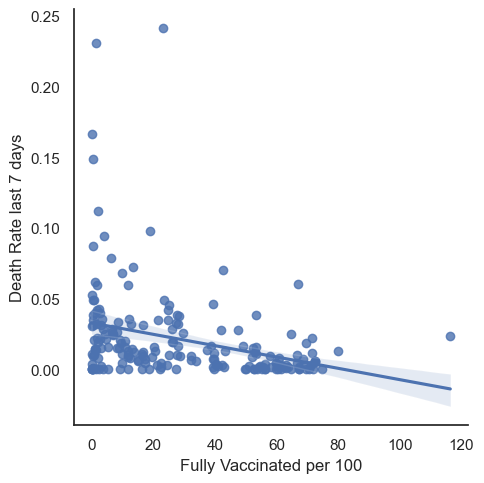

<Figure size 2000x1500 with 0 Axes>

In [27]:
sns.lmplot(x = 'Fully Vaccinated per 100', 
           y = 'Death Rate last 7 days', 
           data = global_cases_deaths_vax)

plt.figure(figsize = (20,15))

plt.show()

(3.5, -0.5)

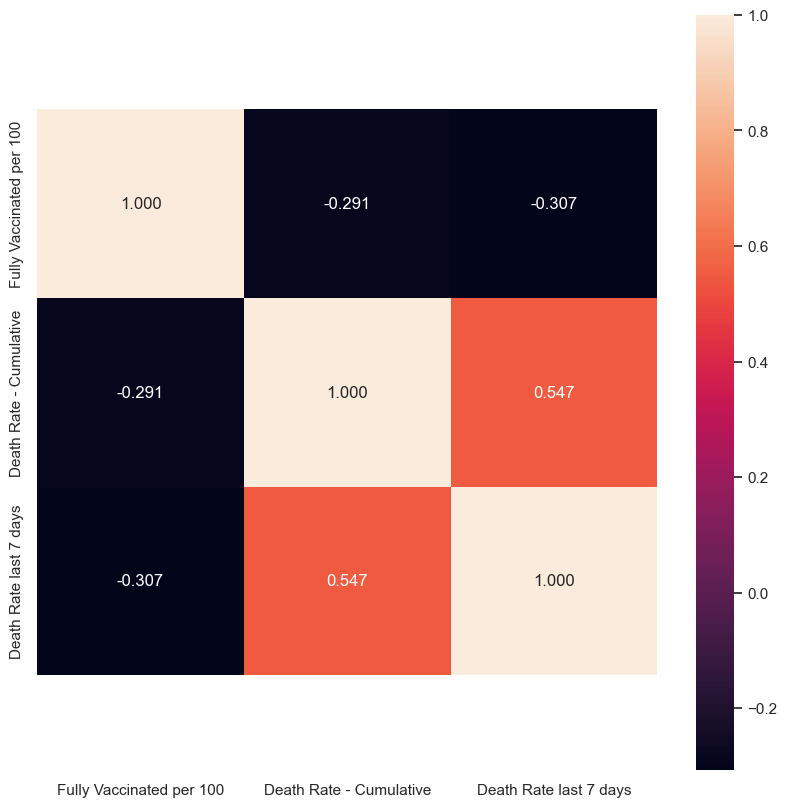

In [28]:
#Correlation using heatmap
global_cases_deaths_vax_2 = global_cases_deaths_vax[['Fully Vaccinated per 100', 
                                                     'Death Rate - Cumulative', 
                                                     'Death Rate last 7 days']]


plt.figure(figsize = (10,10))

ax = sns.heatmap(global_cases_deaths_vax_2.corr(), 
                 annot = True, 
                 fmt = '.3f')

bottom, top = ax.get_ylim()

ax.set_ylim(bottom + 0.5, top - 0.5)